In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# importting dataset csv file

In [255]:
df=pd.read_csv('Customer Churn.csv')

# information of dataset

In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [260]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# data cleaning and processing

In [263]:
from IPython.display import HTML, display

In [264]:
display(HTML("<h4> duplicates  value</h4>"))

In [265]:
df.duplicated().sum()

0

In [266]:
display(HTML("<h4> null value </h4>"))

In [267]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [268]:
display(HTML("<h4> statistical information </h4>"))

In [269]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [270]:
display(HTML("<h4> modified seniour citizenship column</h4>"))

In [271]:
df['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

In [272]:
def convert(value):
    if value==0:
        return 'no'
    else:
        return 'yes'
df['SeniorCitizen']=df['SeniorCitizen'].apply(convert)

In [273]:
df['SeniorCitizen'].unique()

array(['no', 'yes'], dtype=object)

# lets now see insights of data

In [275]:
display(HTML("<h4> how many customers churn ?</h4>"))

Text(0.5, 0, 'churn')

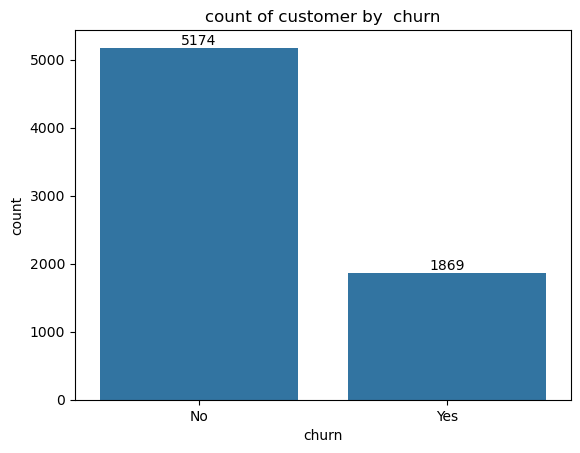

In [276]:
ax=sns.countplot(data=df,x=df['Churn'])
ax.bar_label(ax.containers[0])
plt.title("count of customer by  churn")
plt.ylabel("count")
plt.xlabel("churn")

Text(0.5, 1.0, 'customer churned percentage')

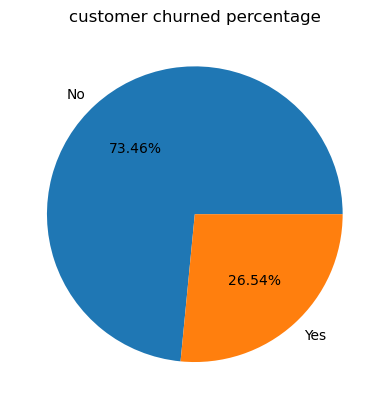

In [281]:
gb=df.groupby('Churn')['Churn'].count()
plt.pie(x=gb,labels=gb.index,autopct="%1.2f%%")
plt.title("customer churned percentage")

#conclusion from above we get like 26% custumers churn .let see reasons behind customer churn further



In [291]:
display(HTML("<h4> how many customers gender wise ?</h4>"))

[Text(0, 0, '3488'), Text(0, 0, '3555')]

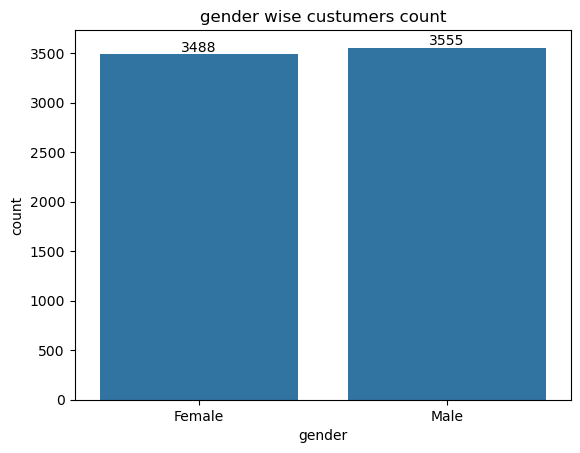

In [292]:
ax=sns.countplot(data=df,x=df['gender'])
plt.title("gender wise custumers count")
ax.bar_label(ax.containers[0])


In [293]:
display(HTML("<h4> how many customers gender wise churn?</h4>"))

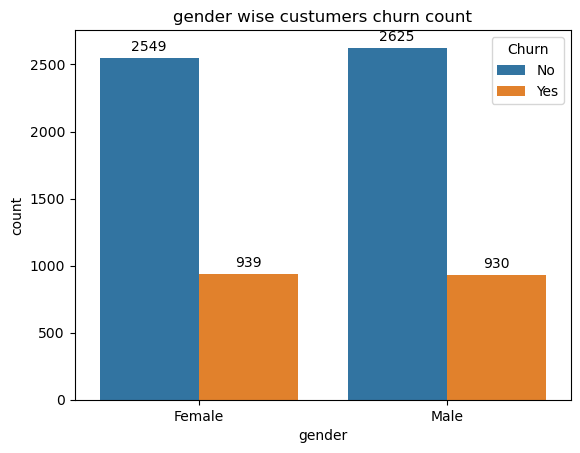

In [295]:
ax=sns.countplot(data=df,x=df['gender'],hue='Churn')
plt.title("gender wise custumers churn count")
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=3)

#as you see above diagram there is no big impact of gender type on churned customers lets see ahead


In [297]:
display(HTML("<h4> how many seniourcitizen customers  churn?</h4>"))

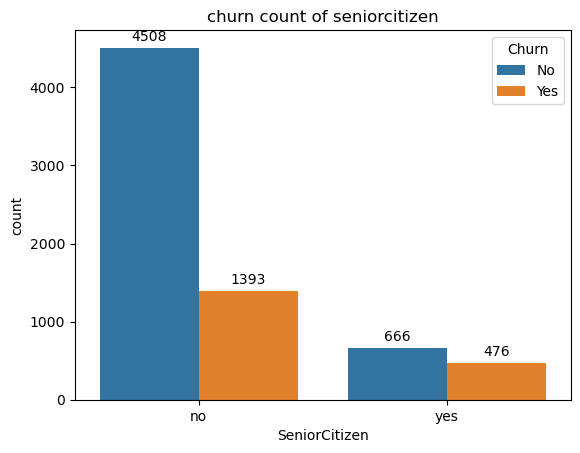

In [298]:
ax=sns.countplot(data=df,x=df['SeniorCitizen'],hue='Churn')
plt.title("churn count of seniorcitizen")
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=3)

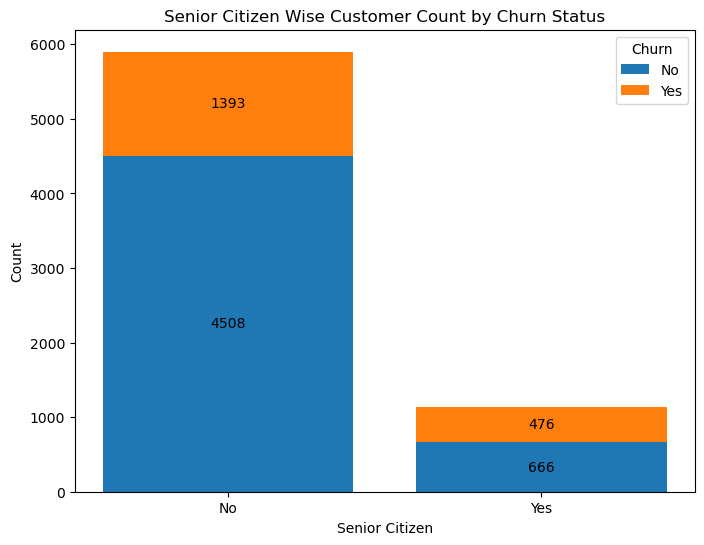

In [299]:
counts = df.groupby(['SeniorCitizen', 'Churn']).size().unstack(fill_value=0)

# Plot stacked bar plot
plt.figure(figsize=(8, 6))
bottom = None  # To stack bars
for churn_status in counts.columns:
    bar = plt.bar(counts.index, counts[churn_status], label=churn_status, bottom=bottom)
    bottom = counts[churn_status] if bottom is None else bottom + counts[churn_status]

   
    for x, y, val in zip(counts.index, bottom, counts[churn_status]):
        plt.text(x, y - val / 2, str(val), ha='center', va='center', fontsize=10)


plt.title("Senior Citizen Wise Customer Count by Churn Status")
plt.xlabel("Senior Citizen")
plt.ylabel("Count")
plt.xticks(counts.index, ['No', 'Yes'])
plt.legend(title='Churn', loc='upper right')
plt.show()

#as you see in above figure those are senior citizen from that majorly amount custumers churned

Text(0.5, 1.0, 'count of customers churn by tenure')

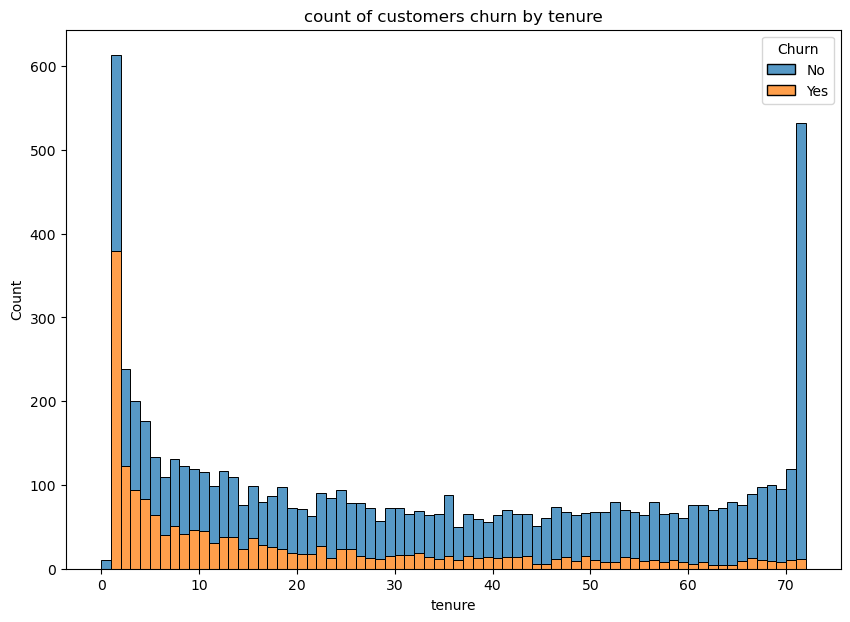

In [306]:
 plt.figure(figsize=(10,7))
sns.histplot(data=df,x='tenure',bins=72,hue='Churn', multiple='stack')

plt.title("count of customers churn by tenure")

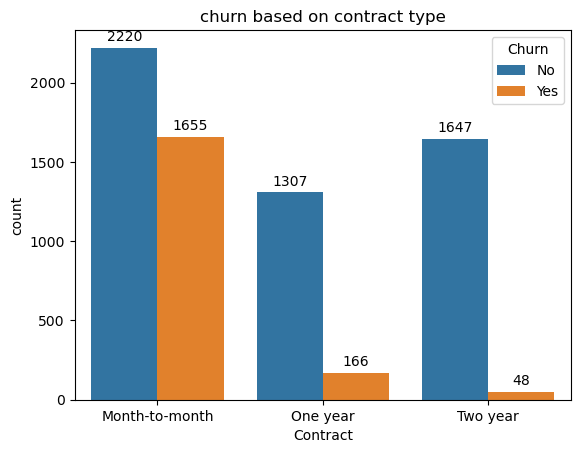

In [309]:
ax=sns.countplot(data=df,x=df['Contract'],hue='Churn')
plt.title("churn based on contract type")
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=3)

#as you see in above figure  that monthly contracted custemers churn most and  long contracted custemers stay with usd

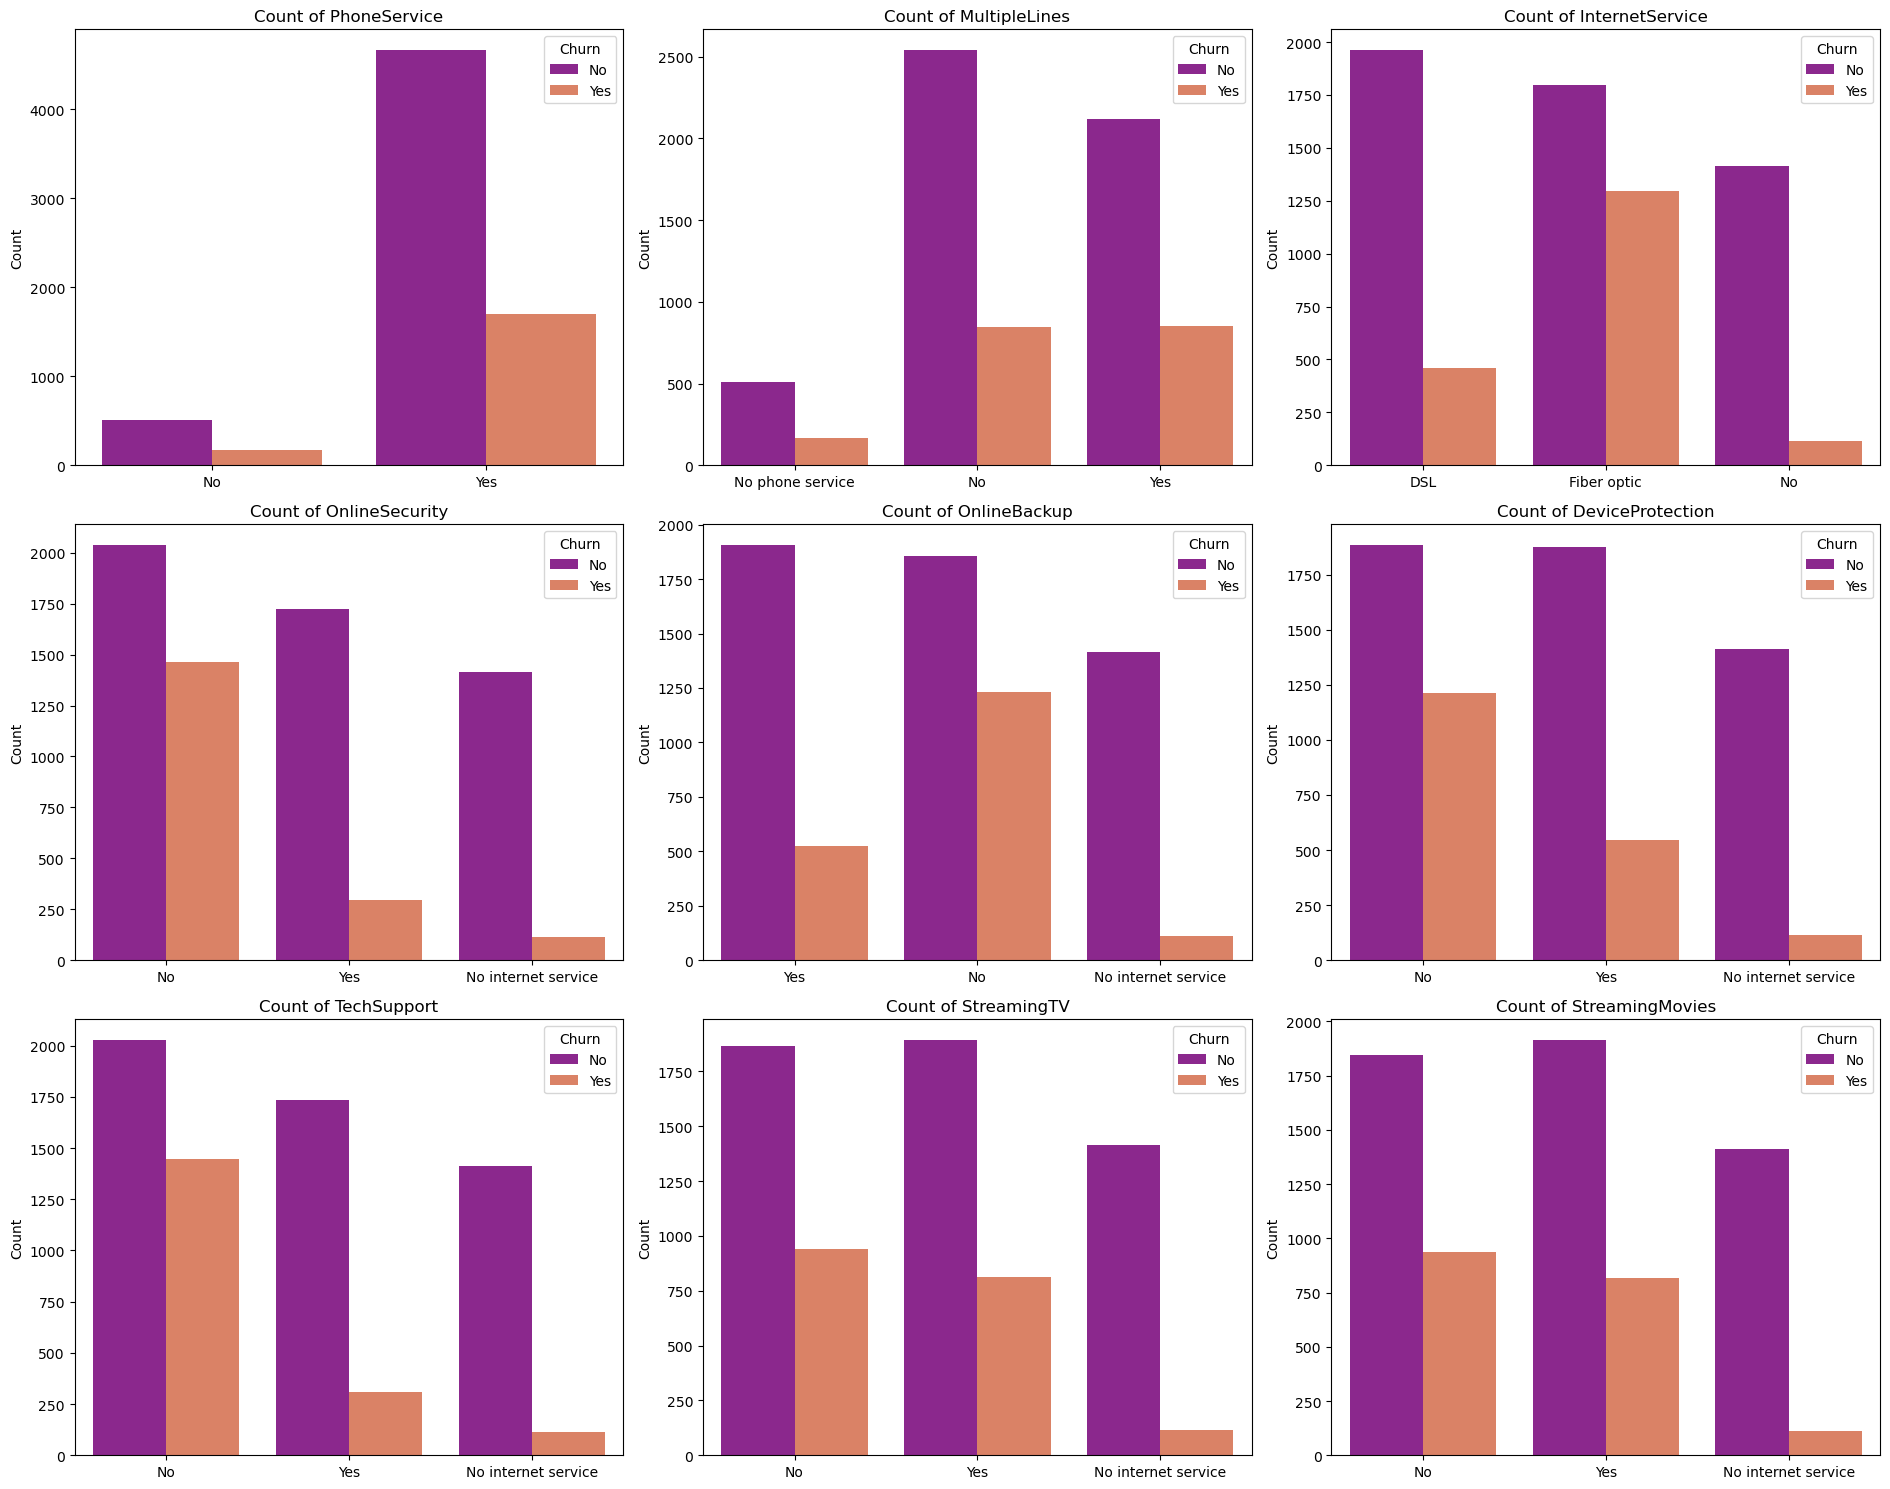

In [313]:

columns_to_plot = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']


fig, axes = plt.subplots(3, 3, figsize=(19, 15))


axes = axes.flatten()


for i, col in enumerate(columns_to_plot):
    sns.countplot(data=df, x=col, ax=axes[i], palette='plasma',hue="Churn")
    axes[i].set_title(f'Count of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')


plt.tight_layout()
plt.show()

If customers don’t have Online Security, Backup, or Tech Support, they’re walking out the door faster.
People who skip Streaming TV or Movies also seem more likely to leave.
Fiber internet users are leaving more than DSL users—maybe it's cost or issues? No internet service? Those customers seem to stick around.
No phone service? Surprisingly, those customers are the least likely to churn.

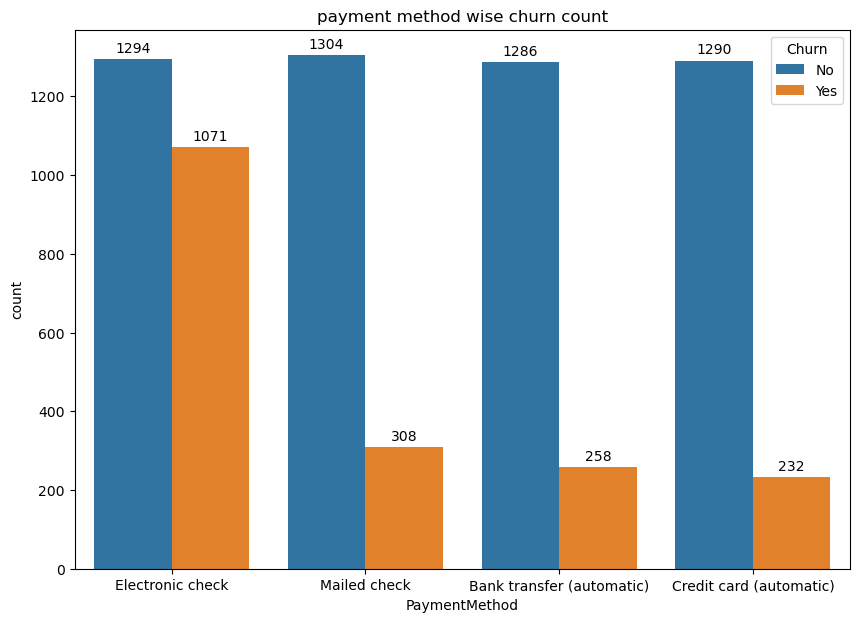

In [316]:
plt.figure(figsize=(10,7))
ax=sns.countplot(data=df,x=df['PaymentMethod'],hue='Churn')
plt.title("payment method wise churn count")
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=10, padding=3)

#as you see in above figure electronic check paymentmethod  customers churned most

Text(0.5, 1.0, 'churn by Monthly charges ')

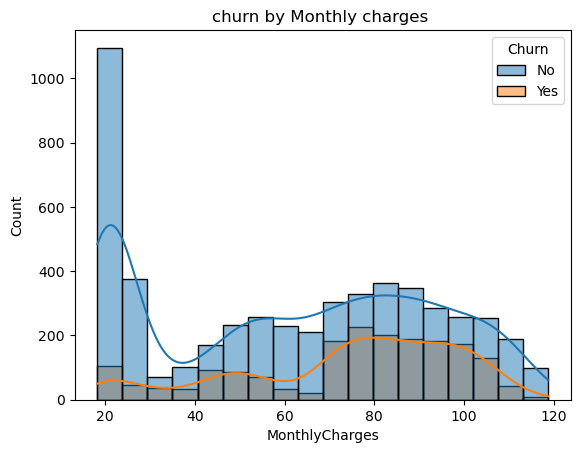

In [321]:
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', kde=True)
plt.title("churn by Monthly charges ")

#Customers with higher monthly charges ($70-$100) are more likely to churn.
To reduce churn, focus on improving value for high-paying customers and address dissatisfaction in mid-high price ranges.